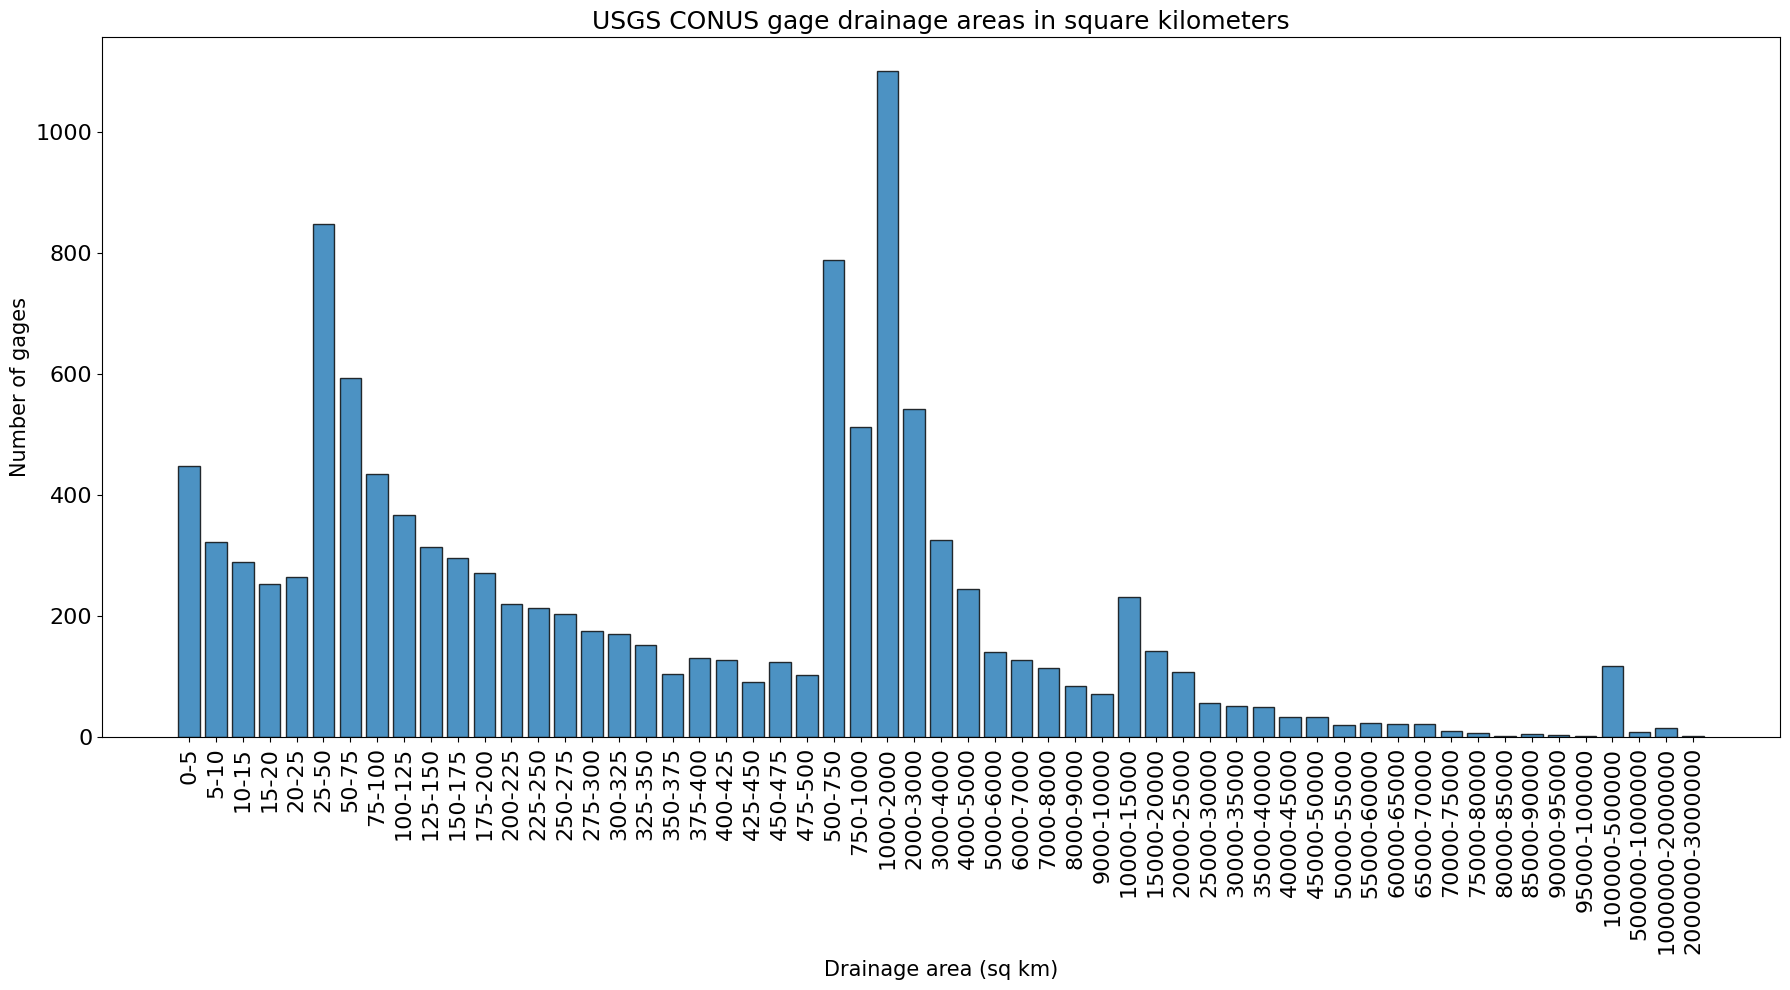

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("conus_usgs_discharge_stations.csv")

# Expect columns like: Drainage_sqkm (e.g., "0-5", "5-10", ...), Count
# If you also have a standalone zero bin, its label might be "0"
df["Drainage_sqkm"] = df["Drainage_sqkm"].astype(str)

# If you want a specific bin order, build it from your bin_edges:
bin_edges = [0, 5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250,
             275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 750, 1000, 2000,
             3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000,
             25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000,
             70000, 75000, 80000, 85000, 90000, 95000, 100000, 500000, 1000000,
             2000000, 3000000, 4000000]

labels_in_order = ["0"] + [f"{bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(bin_edges)-1)]

# Keep only labels we actually have, preserve specified order
df = df[df["Drainage_sqkm"].isin(labels_in_order)].copy()
df["Drainage_sqkm"] = pd.Categorical(df["Drainage_sqkm"],
                                     categories=labels_in_order,
                                     ordered=True)
df.sort_values("Drainage_sqkm", inplace=True)

x = df["Drainage_sqkm"].astype(str).tolist()
y = df["Count"].astype(int).to_numpy()

fig, ax = plt.subplots(figsize=(18, 10))
bars = ax.bar(range(len(y)), y, edgecolor="black", alpha=0.8)

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)
ax.set_xlabel("Drainage area (sq km)", fontsize=15)
ax.set_ylabel("Number of gages", fontsize=15)
ax.set_title("USGS CONUS gage drainage areas in square kilometers", fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
# Optional: show numbers on bars
'''for rect, c in zip(bars, y):
    if c > 0:
        ax.text(rect.get_x() + rect.get_width()/2, c, str(c),
                ha="center", va="bottom", fontsize=12, rotation=90)
'''
plt.tight_layout()
plt.show()

